# Temperature's influence on anomalities

In this notebook I will explore if sensors in lower temperature devices have more anomalities. First , let's combine all the temperature data into one dataframe.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import glob


In [1]:
path = r'data/temp_data'
all_files = glob.glob(path + "/*.xlsx")
dfList = []

for filename in all_files:
    frame = pd.read_excel(filename, index_col=None, header=0)
    dfList.append(frame)

df = pd.concat(dfList, axis=0, ignore_index=True)

Now we take a look at 10 random rows to determine if the datasets have been merged properly. Looks like they have.

In [2]:
df.sample(n=10)

,DeviceId,EventDt,Temp
7105779,Q,2021-06-23 15:20:07.317,19.91
5308339,K,2021-09-15 12:52:30.013,-27.35
8675461,V,2020-08-28 22:07:50.647,4.00
7389694,R,2021-03-05 10:30:30.567,3.91
8470662,U,2021-09-17 19:42:21.397,22.04
4042018,H,2020-05-14 19:29:41.040,-27.11
8774164,V,2021-08-06 15:20:07.560,3.67
5944464,N,2021-10-02 06:29:05.560,18.25
7871578,T,2019-09-05 11:48:32.373,16.36
4970453,J,2021-06-12 23:50:31.773,20.77


In order to conclude if colder devices have more anomalies, we will be taking the 5 hottest and coldest devices (on average), and looking which have more anomalities.

In [7]:
hotcold = []
# Het hele zoeken van de warmste en koudste devices kan probably veel makkelijker
for filename in all_files:
    device = pd.read_excel(filename)
    # get data
    avg_temp = device["Temp"].mean()
    device = device["DeviceId"].iloc[0]
    # new entry to list
    hotcold.append(
        {
            "DeviceId": device,
            "Temp": avg_temp
        }
    )
    # debug
    # print(avg_temp)
    # print(device["DeviceId"].iloc[0])

df_hotcold = pd.DataFrame(hotcold)
    

Now we just sort the output by temperature, to see which devices are the coldest and the hottest. And divide them into the hottest 5 and coldest 5. Now we can see which devices are the coldest and hottest.

In [21]:
df_coldest = df_hotcold.sort_values(by=["Temp"]).head(5)
df_hottest = df_hotcold.sort_values(by=["Temp"]).tail(5)

print("coldest devices: ")
print(df_coldest["DeviceId"])

print("hottest devices: ")
print(df_hottest["DeviceId"])

coldest devices: 
14     K
11     H
8      E
1     AA
27     Y
Name: DeviceId, dtype: object
hottest devices: 
23     U
17     O
19     Q
9      F
3     AC
Name: DeviceId, dtype: object


Let's see if we can find the outliers of device K

In [22]:
#loading in K
df_K = pd.read_excel('data/temp_data/data_K.xlsx')

Let's plot K. The outliers are shown as the red dots. 

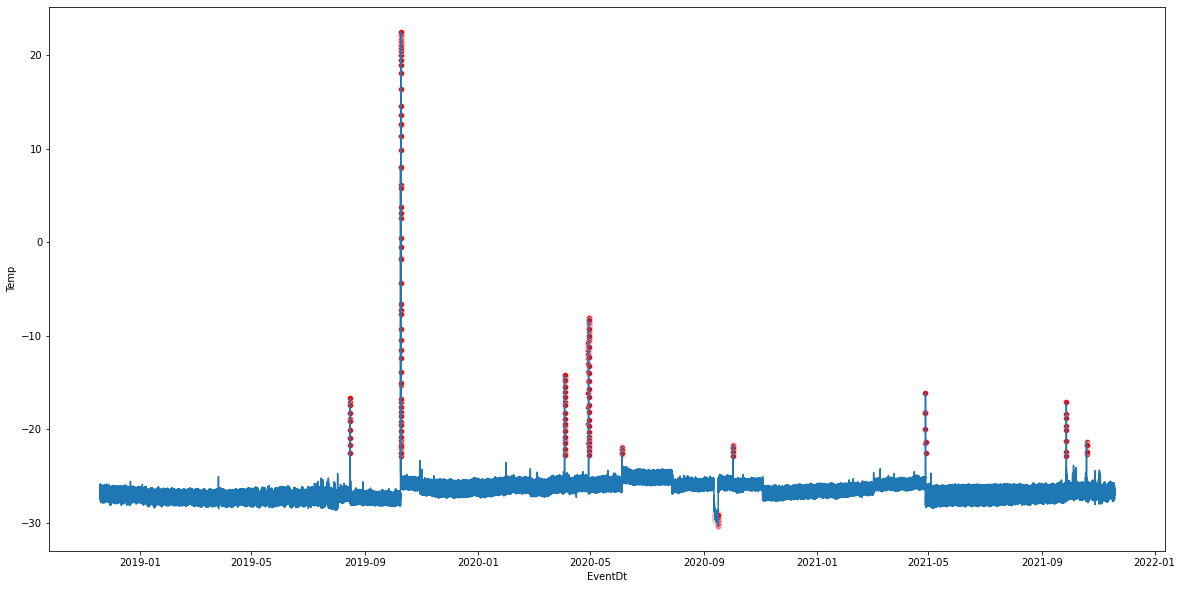

In [38]:
sns.lineplot(x="EventDt", y="Temp", data=df_K)

outliers_K = df_K.loc[((df_K["Temp"] > -23) == True) | ((df_K["Temp"] < -29) == True)]
sns.scatterplot(x="EventDt", y="Temp", data=outliers_K, c=['r'])

plt.gcf().set_size_inches(20, 10)